# Execute evaluation and visualization code from the Github repository.

 ## 1. Import required libraries.

In [11]:
import netCDF4
import netCDF4 as nc
import pandas as pd
import numpy as np
import xarray as xr
import datetime
import datetime as dt
from netCDF4 import date2num,num2date
from math import sqrt

## 2. Mount Google Drive and read daily data.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rdata_daily = xr.open_dataset('/content/drive/MyDrive/ERA5_meteo_sfc_2021_daily.nc') #.rename({'latitude':'lat','longitude':'lon'})
#rdata_daily = rioxarray.open_rasterio('/content/drive/MyDrive/ERA5_meteo_sfc_2021_daily.nc').rename({'y':'lon','x':'lat'})
rdata_daily

<xarray.Dataset>
Dimensions:    (time: 365, longitude: 41, latitude: 41)
Coordinates:
  * time       (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
  * longitude  (longitude) float32 -33.0 -32.75 -32.5 ... -23.5 -23.25 -23.0
  * latitude   (latitude) float32 43.0 42.75 42.5 42.25 ... 33.5 33.25 33.0
Data variables:
    sp         (time, latitude, longitude) float64 ...
    sst        (time, latitude, longitude) float64 ...
    u10        (time, latitude, longitude) float64 ...
    v10        (time, latitude, longitude) float64 ...
    sshf       (time, latitude, longitude) float64 ...
    slhf       (time, latitude, longitude) float64 ...
    t2m        (time, latitude, longitude) float64 ...
Attributes:
    title:          Daily variables from ERA5 hourly data
    history:        Wed Mar 23 12:01:11 2022: ncrcat ERA5_meteo_sfc_2021_01-0...
    Input dataset:  /global/cscratch1/sd/xzheng/ENA/rawdata/ERA5_meteo_sfc_20...
    NCO:            netCDF Operators version 5.0.1 (Homepage = http://nco.sf....

## 3. I have just created an array that mimics the clustering results to compute the evaluation. Normally this will be the result of the clustering method.

In [4]:
formed_clusters=np.array([4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 0, 4, 4, 0, 4, 0, 0, 0, 0, 0, 4,4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 2, 4, 4, 0, 0, 0, 0, 0, 0,3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 2, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4,4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 0,3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0,0, 3, 3, 2, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 0, 0, 4, 2, 4, 4, 4,4, 4, 4, 4, 6, 4, 4, 6, 2, 2, 6, 6, 4, 6, 6, 6, 6, 6, 6, 2, 6, 6,6, 6, 6, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1,1, 1, 1, 1, 1, 1, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5,1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5,5, 5, 1, 1, 5, 1, 1, 1, 1, 2, 5, 5, 5, 5, 1, 6, 6, 6, 6, 6, 2, 2,6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 3, 2, 6, 4, 0, 3, 3,3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3])

In [12]:
formed_clusters

array([4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 0, 4, 4, 0, 4, 0, 0, 0, 0, 0, 4,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 2, 4, 4, 0, 0, 0, 0, 0, 0,
       3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 2, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 0,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0,
       0, 3, 3, 2, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 0, 0, 4, 2, 4, 4, 4,
       4, 4, 4, 4, 6, 4, 4, 6, 2, 2, 6, 6, 4, 6, 6, 6, 6, 6, 6, 2, 6, 6,
       6, 6, 6, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1,

## 4. Download the multivariate-weather-data-clustering repository from Github in ZIP format and upload that ZIP folder in the Colab notebook memory. Then unzip it and rename the folder as multivariateweatherdataclusteringmain.

In [6]:
!unzip /content/multivariate-weather-data-clustering-main.zip

Archive:  /content/multivariate-weather-data-clustering-main.zip
0be8d690d1d5632523d0dc3223b7ecaf9a9c1085
   creating: multivariate-weather-data-clustering-main/
  inflating: multivariate-weather-data-clustering-main/.DS_Store  
  inflating: multivariate-weather-data-clustering-main/.gitignore  
   creating: multivariate-weather-data-clustering-main/Benchmark/
  inflating: multivariate-weather-data-clustering-main/Benchmark/.DS_Store  
   creating: multivariate-weather-data-clustering-main/Benchmark/Affinity_Propagation/
  inflating: multivariate-weather-data-clustering-main/Benchmark/Affinity_Propagation/Affinity_Propagation_PCA11_Norm.ipynb  
   creating: multivariate-weather-data-clustering-main/Benchmark/Dbscan/
  inflating: multivariate-weather-data-clustering-main/Benchmark/Dbscan/Git_testing_DBscan_SST_only.ipynb  
  inflating: multivariate-weather-data-clustering-main/Benchmark/Dbscan/Git_testing_DBscan_all_variables_.ipynb  
  inflating: multivariate-weather-data-clustering-ma

In [7]:
!mv multivariate-weather-data-clustering-main multivariateweatherdataclusteringmain

## 5. For running the visualization code, import the file using the full structure and execute the visualization function.

In [8]:
from multivariateweatherdataclusteringmain.MWDC.Visualization.Visualization import visualization

In [9]:
df=pd.DataFrame()
df1=pd.DataFrame()
df['time_step'] = np.arange(len(formed_clusters))
df['clusterid'] = pd.DataFrame(formed_clusters)
df.to_csv('/content/drive/MyDrive/cluster-result-1.csv',index=True)

total clusters:  7
varid: sst
var_range: [286.9919318332959, 299.0668423730597]


/content/multivariateweatherdataclusteringmain/MWDC/Visualization/Visualization.py:131: RuntimeWarning: Mean of empty slice
  var_mean_icluster = np.nanmean(var_icluster,axis=0)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/content/multivariateweatherdataclusteringmain/MWDC/Visualization/Visualization.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot(panel)
/content/multivariateweatherdataclusteringmain/MWDC/Visualization/Visualization.py:74: UserWarning: The following kwargs were not used by contour: 'linewidth'
  p1=ax.contour(lon0,lat0,var,cmap=cmap0

varid: t2m
var_range: [-0.08280723076385484, -0.07839707801928061]
varid: u10
var_range: [-15.129702662479593, 16.82725476413482]
varid: v10
var_range: [-14.294945017569995, 14.039669939743764]
varid: sshf
var_range: [-43.41541985801895, 175.22246693947238]
varid: sp
var_range: [985.3787786916515, 1035.1150602330122]


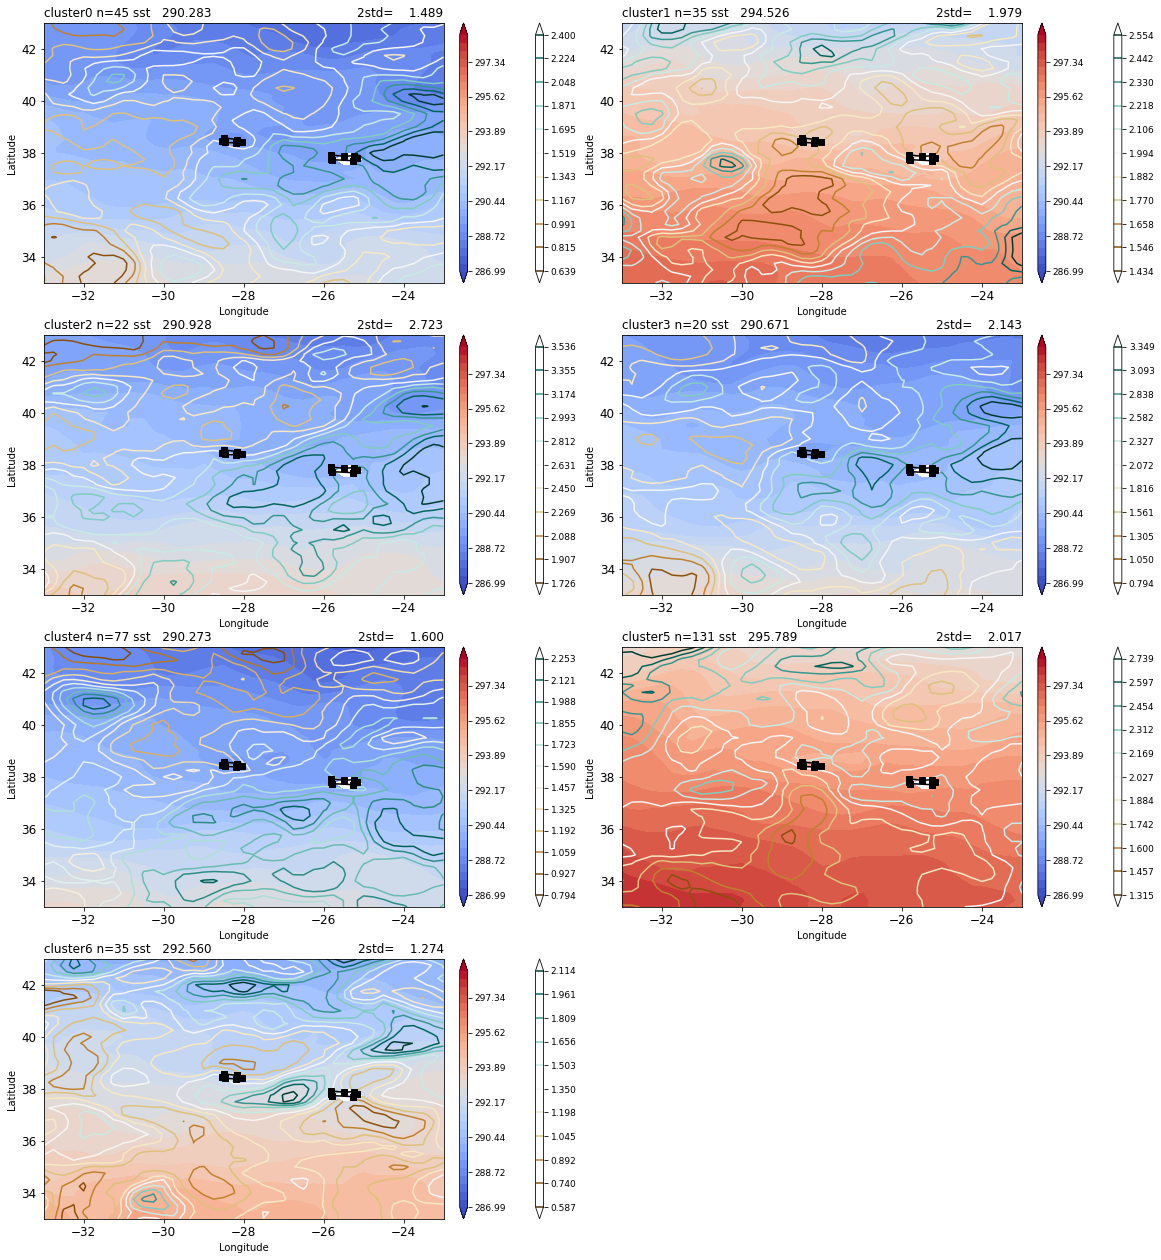

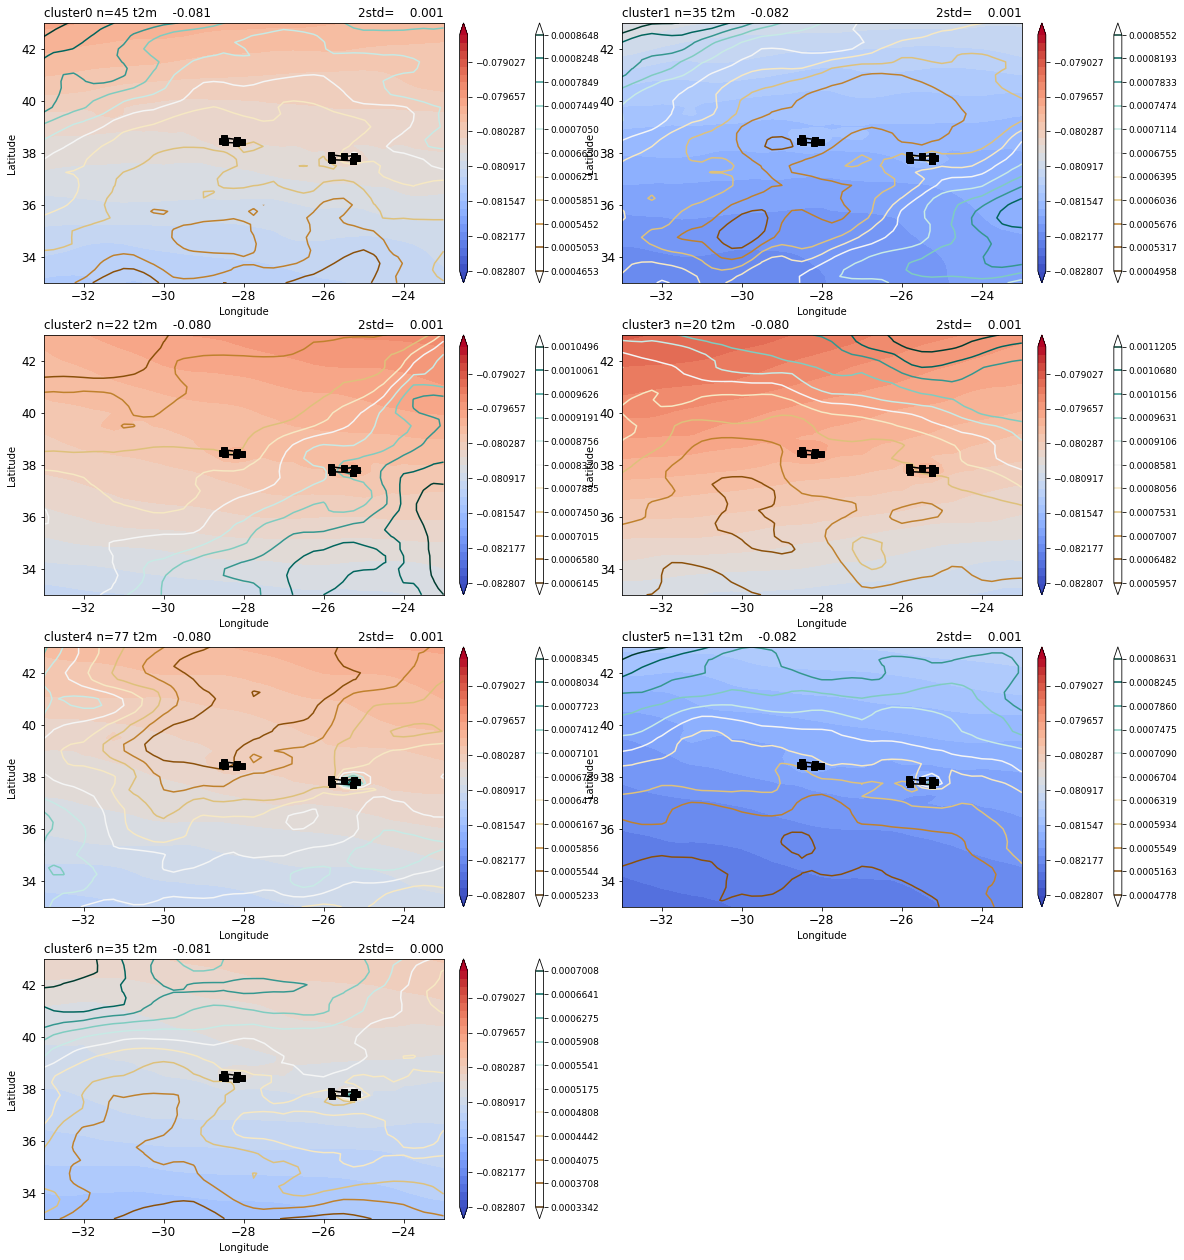

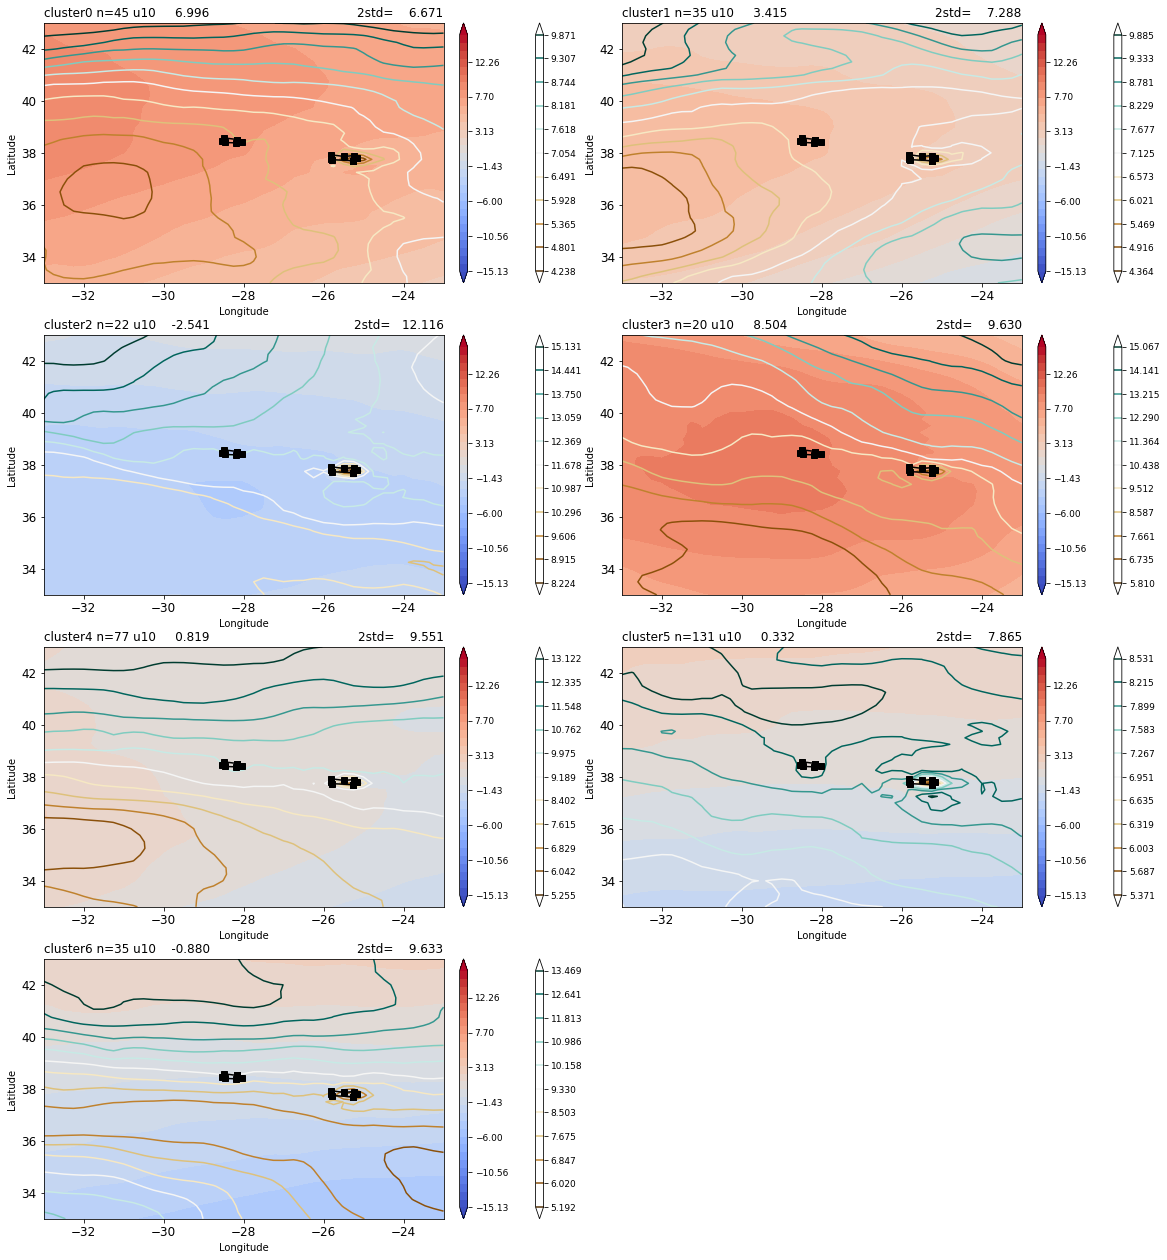

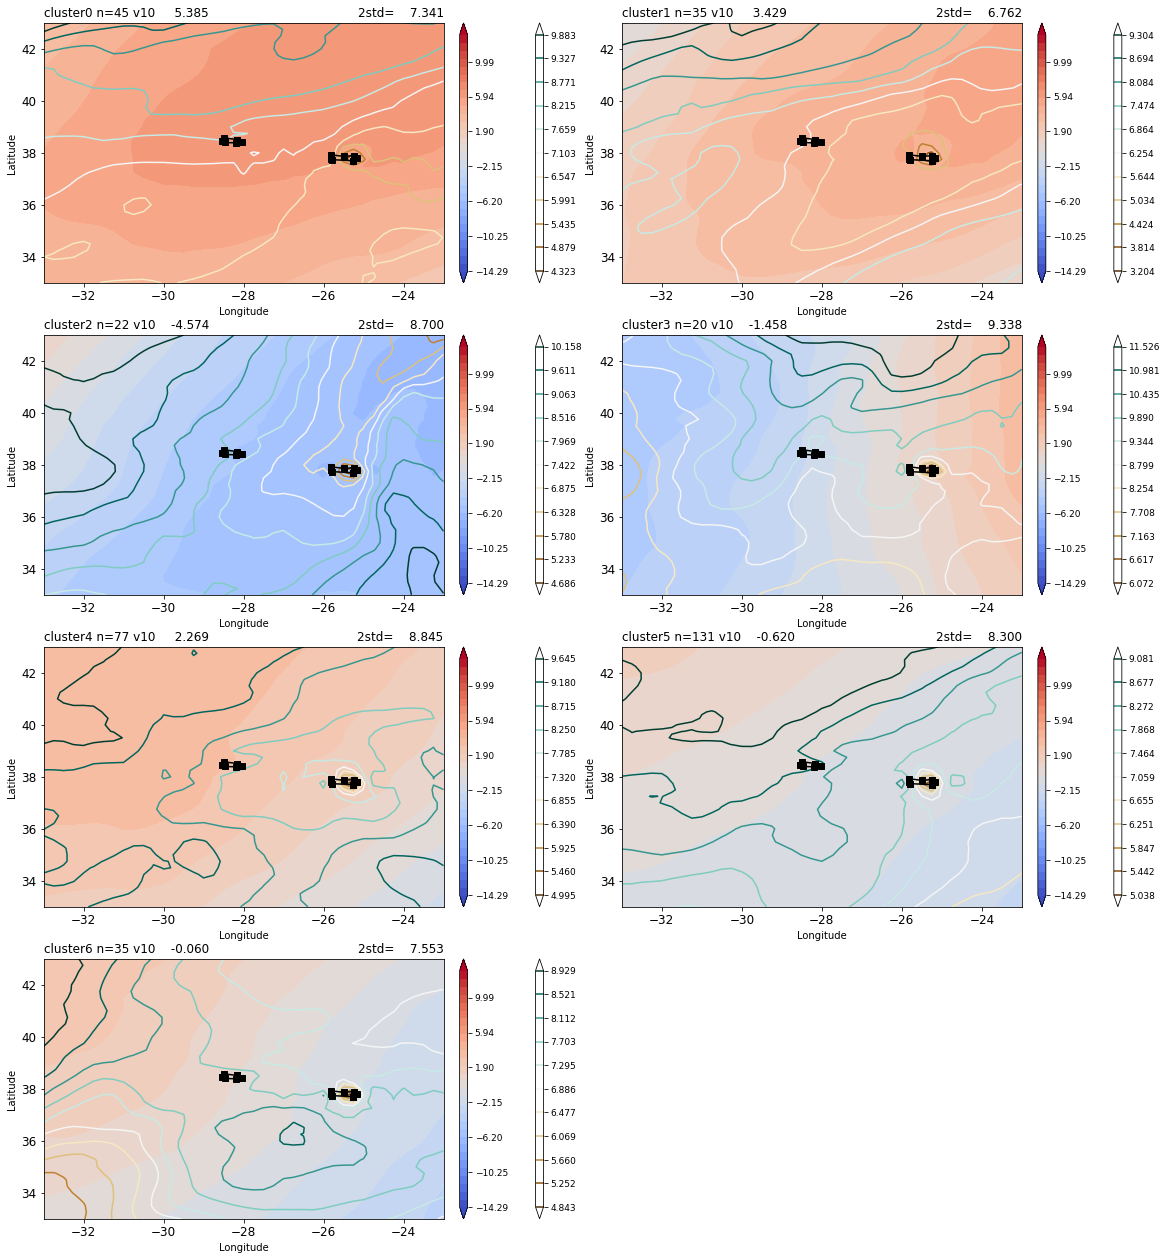

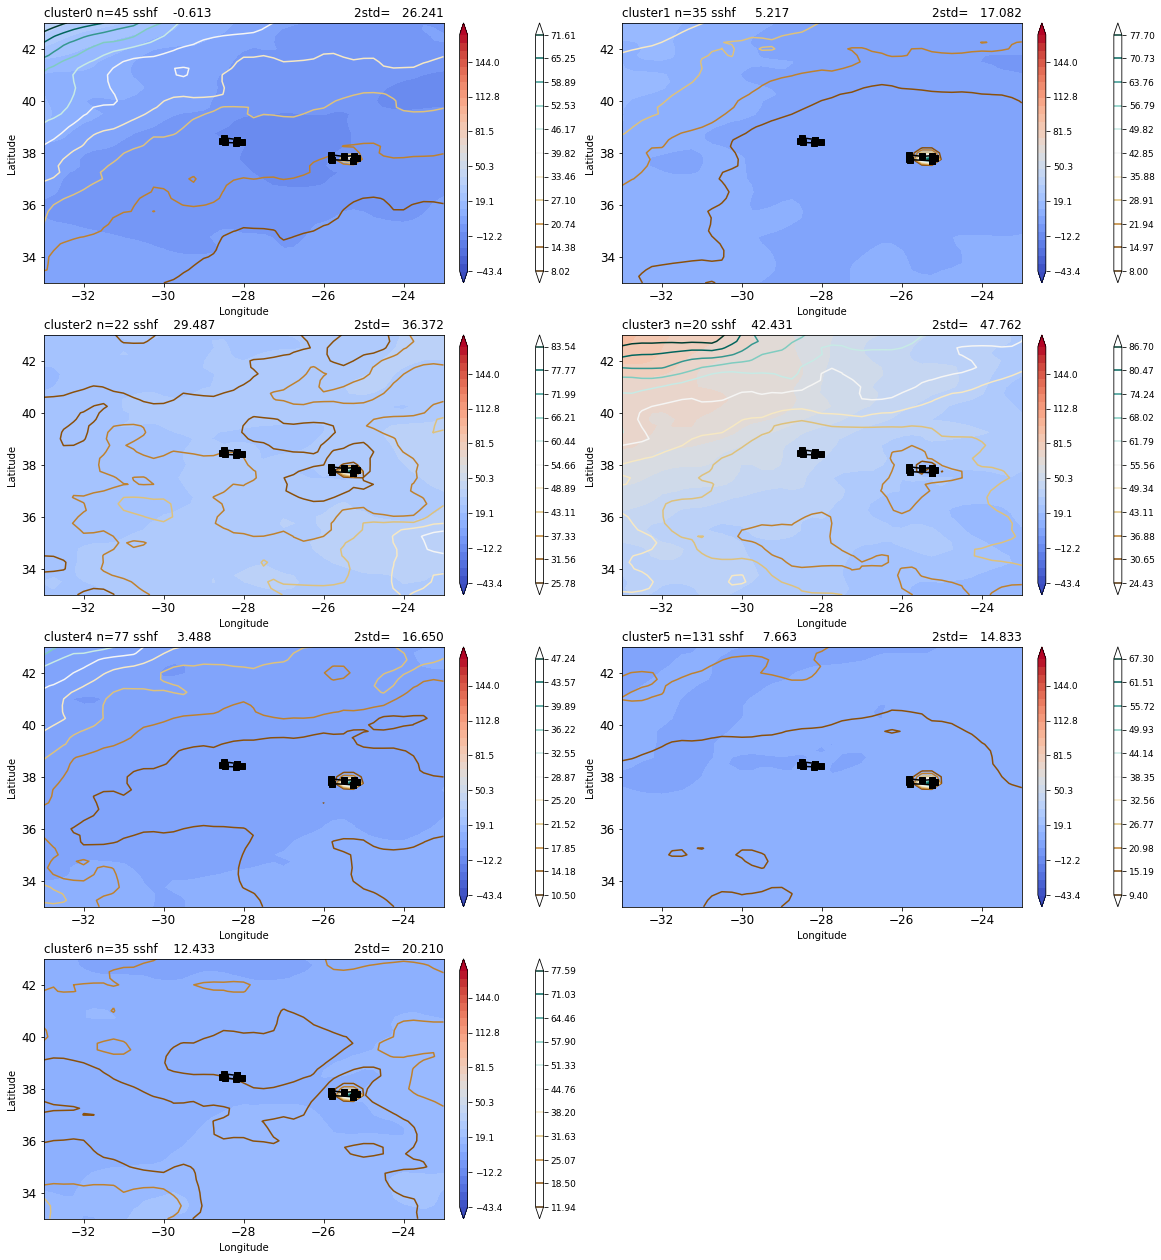

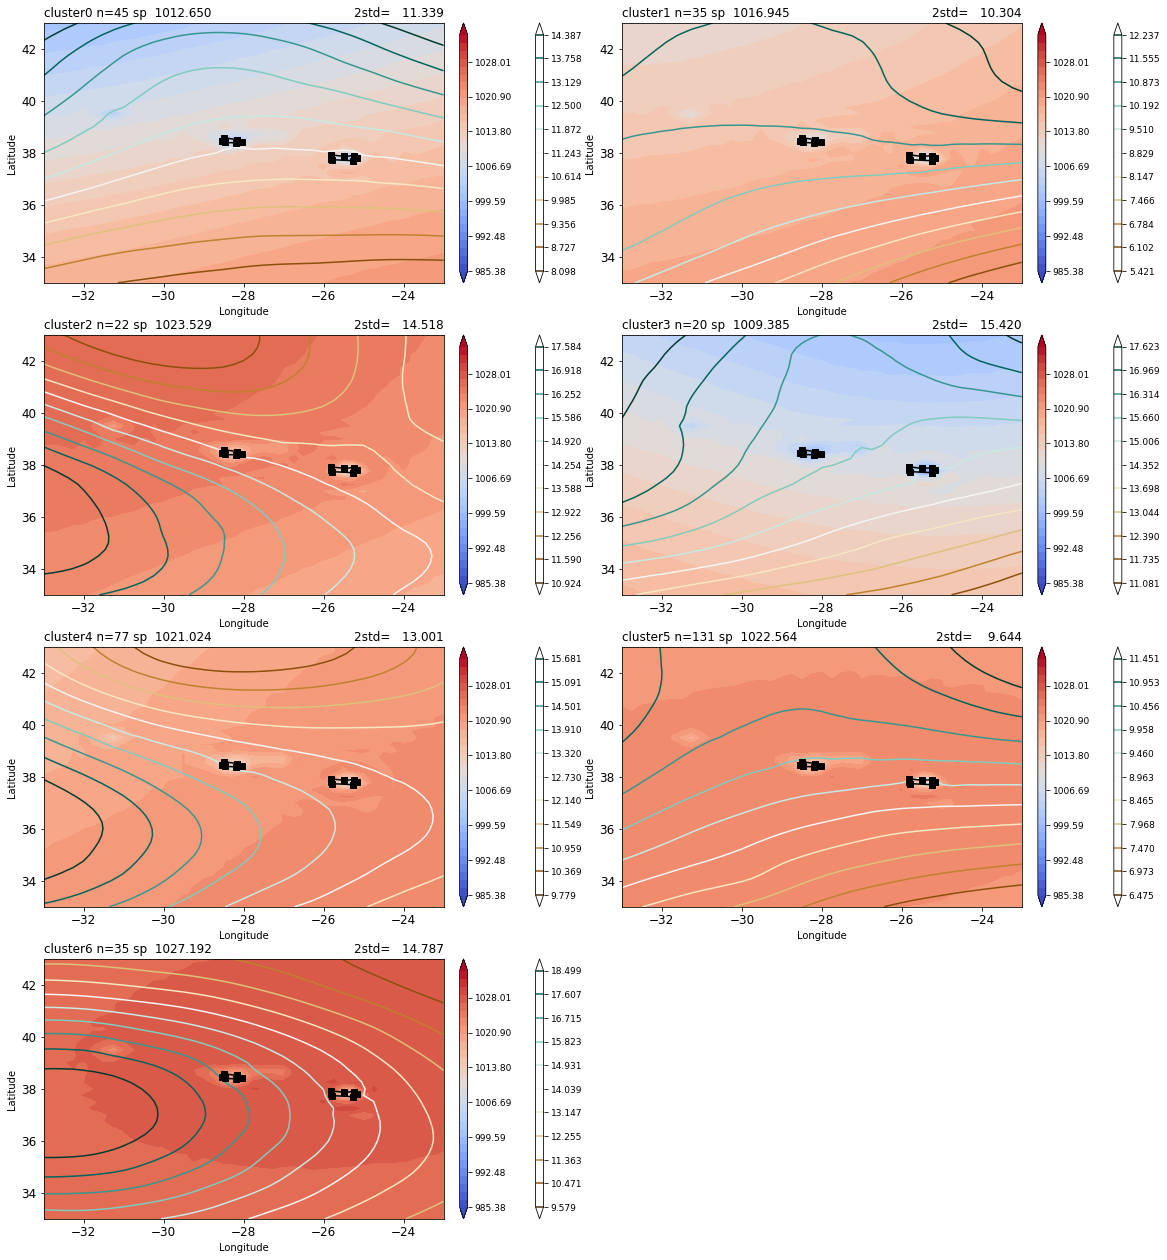

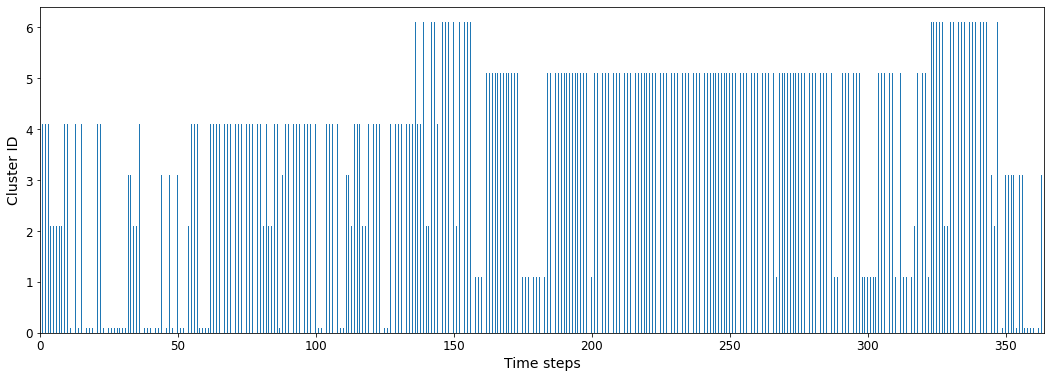

In [10]:
visualization('/content/drive/MyDrive/ERA5_meteo_sfc_2021_daily.nc' ,'/content/drive/MyDrive/cluster-result-1.csv', '/content/multivariateweatherdataclusteringmain/MWDC/Visualization/coast.txt')

## 6. To generate the evaluation matrix:
a. First open the "/content/multivariateweatherdataclusteringmain/MWDC/Evaluation/st_evaluation.py" file in the notebook. (Double-click on the file in the left panel.)

b. Change line number 19 like this:

\#from MWDC.preprocessing import datatransformation, datanormalization

from multivariateweatherdataclusteringmain.MWDC.preprocessing import datatransformation, datanormalization

c. Comment out line number 16 and 17.

In [14]:
from multivariateweatherdataclusteringmain.MWDC.Evaluation.st_evaluation import *

In [15]:
ST_RMSE(rdata_daily,formed_clusters,True)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


,0,1,2,3,4,5,6
0,12.79,25.67,28.91,24.38,13.84,35.76,24.56
1,25.67,12.38,33.03,35.08,26.17,12.49,19.84
2,28.91,33.03,19.06,23.91,20.66,34.5,17.2
3,24.38,35.08,23.91,18.14,27.96,41.81,30.74
4,13.84,26.17,20.66,27.96,13.95,32.75,16.21
5,35.76,12.49,34.5,41.81,32.75,12.99,21.1
6,24.56,19.84,17.2,30.74,16.21,21.1,14.25


In [16]:
ST_CORRELATION(rdata_daily,formed_clusters,True)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


TypeError: ignored